## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [92]:
# Final Project Submission - Phase 1 Project

# Student Name: KIM, Jae Heon
# Student Pace: Full Time, NYC
# Schedule Project Review Date/Time:
# Instructor Name: Brendan Hutchinson
# Blog post URL:

In [93]:
# Import all the statistical packages necessary for this project.

import pandas as pd
import numpy as np
import sqlite3
import zipfile
import csv

In [94]:
# Import all the data visualization packages necessary for this project.

import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# Turn all CSV and TSV files into Pandas Dataframe to develope further studies.

bom_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tn_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [96]:
!ls zippedData

bom.movie_gross.csv.gz  im.db2                  rt.reviews.tsv.gz
im.db                   im.db3                  tmdb.movies.csv.gz
im.db.zip               rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz


In [97]:
%%bash

sqlite3 zippedData/im.db3
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [98]:
# Turn db file into Pandas Dataframe

# Exctract zipped file


# Get connection to the database. Check if multiple tables exist.
conn = sqlite3.connect('zippedData/im.db3')
cursor_obj = conn.cursor()
cursor_obj.execute("SELECT name from sqlite_master where type='table';")
print(cursor_obj.fetchall())

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [99]:
# Turn db file into Pandas Dataframe

# Explore each of 8 tables individually to determine which are useful for this project.
survey1_df = pd.read_sql("SELECT * FROM movie_basics", conn)
survey2_df = pd.read_sql("SELECT * FROM directors", conn)
survey3_df = pd.read_sql("SELECT * FROM known_for", conn)
survey4_df = pd.read_sql("SELECT * FROM movie_akas", conn)
survey5_df = pd.read_sql("SELECT * FROM movie_ratings", conn)
survey6_df = pd.read_sql("SELECT * FROM persons", conn)
survey7_df = pd.read_sql("SELECT * FROM principals", conn)
survey8_df = pd.read_sql("SELECT * FROM writers", conn)

# After brief survey of each table, only survey1_df and survey5_df are wanted.
# Join these two tables using SQL for simplification.
imdb_df = pd.read_sql("""
    SELECT *
    FROM movie_basics as mb
    JOIN movie_ratings as mr
        ON mb.movie_id = mr.movie_id
""", conn)

In [100]:
# Make a list of dataframes that will be used in this project for organization.
# Open each element and see if further drops can be made.

project_data = [bom_gross_df, tmdb_movies_df, tn_budgets_df, imdb_df]

In [101]:
# Project Objectives:
#
# My goal is to provide four recommendations to Microsoft on film-making in their original contents business.
# Answers to the following three questions will be my recommendations to Microsoft:
#
# 1. Define a good Return on Investment.
#    Make a dataframe with movies that has a good ROI.
#    Study the shape of ROI distribution for each genre.
#    This will give us an idea of what budget scale to take
#
# 2. In this dataframe, find relationship between playing time, genres and budget scale.
#    Based on this result, suggest which movie length is ideal for each genre.
#
# 3. Study the season in which each genre performs the best with respect to the budget scale.
#    Optimize the release time of movie based on its genre.
#
# 4. Compare the average rating for each genre. Focus only on ratings.
#    We are interested in creating films that have the best quality.
#    While this may not be directly proportional to financial success, good works build platform's reputation and
#    create strong brand image.
#    We want to make sure the studion business not only post profits immediately,
#    but also emerge as a top producer of quality products.

In [102]:
imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5


In [103]:
bom_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [104]:
tmdb_movies_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [105]:
tn_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [106]:
# Start with cleaning tn_budgets_df and assign it to tn.
# Select the columns necessary for the project and rename them neatly.

selected_columns = ['release_date', 'movie', 'production_budget', 'worldwide_gross']
tn = tn_budgets_df[selected_columns]
tn = tn.rename(columns = {'release_date':'Date', 'movie':'Movie',
                         'production_budget':'Budget', 'worldwide_gross':'Revenue'})
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     5782 non-null   object
 1   Movie    5782 non-null   object
 2   Budget   5782 non-null   object
 3   Revenue  5782 non-null   object
dtypes: object(4)
memory usage: 180.8+ KB


In [107]:
# Further change data types of some columns so deeper evaluation can be done.

tn['Revenue'] = pd.to_numeric(tn['Revenue'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
tn['Budget'] = pd.to_numeric(tn['Budget'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')


In [108]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     5782 non-null   object
 1   Movie    5782 non-null   object
 2   Budget   5782 non-null   int64 
 3   Revenue  5782 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 180.8+ KB


In [109]:
# Change ['Movie']'s data type to strings so it can be merged in future with other tables.
# Change ['Release Date']'s data type to datetime.

tn['Movie'] = tn['Movie'].astype(str)
tn['Date'] = pd.to_datetime(tn['Date'])

In [110]:
# There are some entries of value 0 in the Revenue column.
# Such numbers are more likely have been there due to unavailable data.
# Most of them come from 'extremely low budget movies' and thus are
# less likely meaningful for Microsoft.
# Rows that have Revenue values 0 will be dropped from this study.

tn = tn[tn.Revenue != 0]

In [111]:
tn

,Date,Movie,Budget,Revenue
0,2009-12-18,Avatar,425000000,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
2,2019-06-07,Dark Phoenix,350000000,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747
...,...,...,...,...
5775,2006-05-26,Cavite,7000,71644
5776,2004-12-31,The Mongol King,7000,900
5778,1999-04-02,Following,6000,240495
5779,2005-07-13,Return to the Land of Wonders,5000,1338


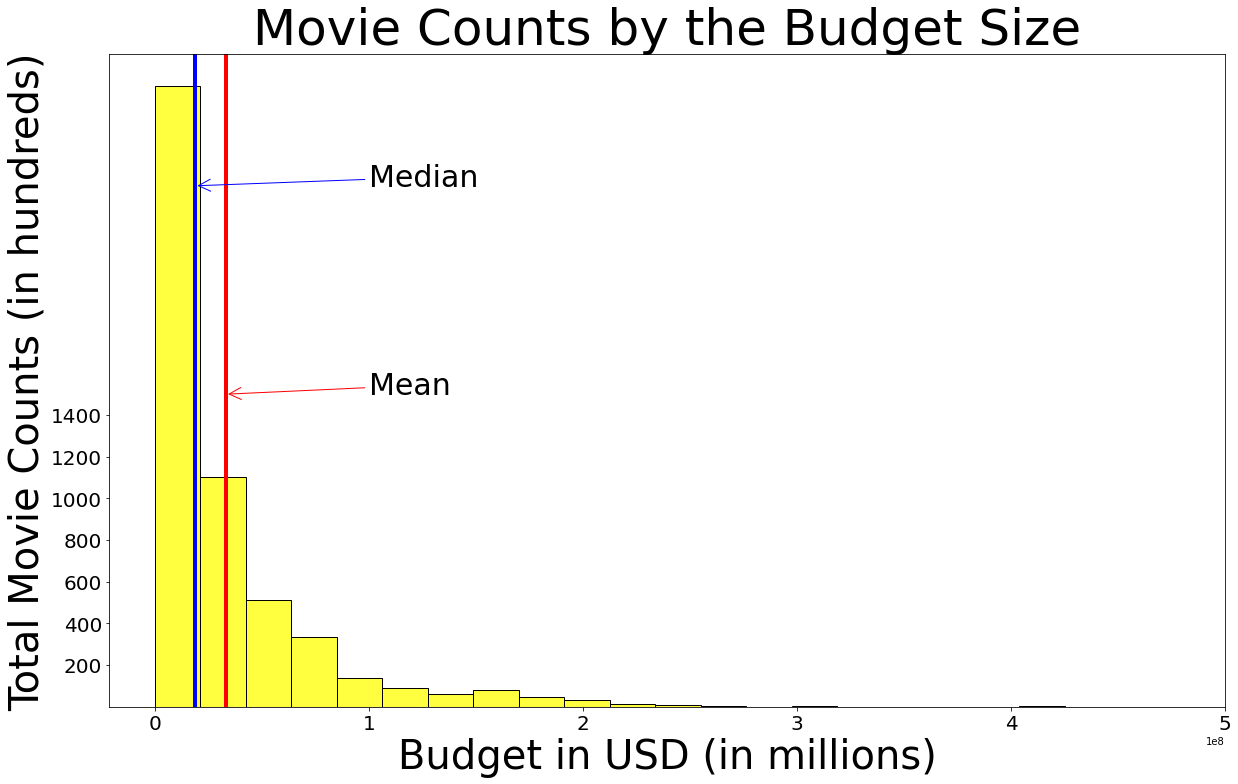

In [112]:

fig, ax = plt.subplots(figsize=(20, 12))
sns.histplot(x=tn['Budget'], data=tn, bins=20, color='yellow')
plt.title("Movie Counts by the Budget Size", fontsize=50)
plt.xlabel("Budget in USD (in millions)", fontsize=40)
plt.ylabel("Total Movie Counts (in hundreds)", fontsize=40)
plt.axvline(tn['Budget'].mean(), color='r', linestyle='-', linewidth=4)
plt.axvline(tn['Budget'].median(), color='b', linestyle='-', linewidth=4)
plt.annotate('Mean', xy=(tn['Budget'].mean(), 1500), xytext=(100000000, 1500),
             fontsize=30, arrowprops={'arrowstyle': '->', 'color': 'red'})
plt.annotate('Median', xy=(tn['Budget'].median(), 2500), xytext=(100000000, 2500),
             fontsize=30, arrowprops={'arrowstyle': '->', 'color': 'b'})
plt.xticks(range(0,600000000,100000000),fontsize=20)
plt.yticks(range(200,1600,200), fontsize=20)
plt.show()

In [113]:
# Compute the mean and median of budget.

print('Median Budget:  ' + str(round(tn['Budget'].median(), 3)))
print('Mean Budget:    ' + str(round(tn['Budget'].mean(), 3)))
print('Maximum Budget: ' + str(round(tn['Budget'].max(), 3)))
print('Minimum Budget: ' + str(round(tn['Budget'].min(), 3)))

Median Budget:  19000000.0
Mean Budget:    33308006.085
Maximum Budget: 425000000
Minimum Budget: 1100


In [114]:
# In 2021, Microsoft was sitting on a cash reserve of $130B.
# Microsoft can easily raise enormous capital.
# Given their firepower and enthusiasm for original contents,
# We can narrow our attention to movies whose budgets are equal to median budget or higher.

tn = tn[tn.Budget >= tn.Budget.median()]
tn

,Date,Movie,Budget,Revenue
0,2009-12-18,Avatar,425000000,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
2,2019-06-07,Dark Phoenix,350000000,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747
...,...,...,...,...
2749,2018-06-01,Action Point,19000000,5103675
2750,1964-01-01,The Fall of the Roman Empire,19000000,4750000
2751,1993-11-24,The Nutcracker,19000000,2119994
2752,2011-12-13,George Balanchine\'s The Nutcracker,19000000,2119994


In [115]:
# Create a new column ROI (Return on Investment).

tn['ROI'] = tn['Revenue']/tn['Budget']
tn.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2724 entries, 0 to 2753
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2724 non-null   datetime64[ns]
 1   Movie    2724 non-null   object        
 2   Budget   2724 non-null   int64         
 3   Revenue  2724 non-null   int64         
 4   ROI      2724 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 127.7+ KB


<ipython-input-115-674b011f8689>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn['ROI'] = tn['Revenue']/tn['Budget']


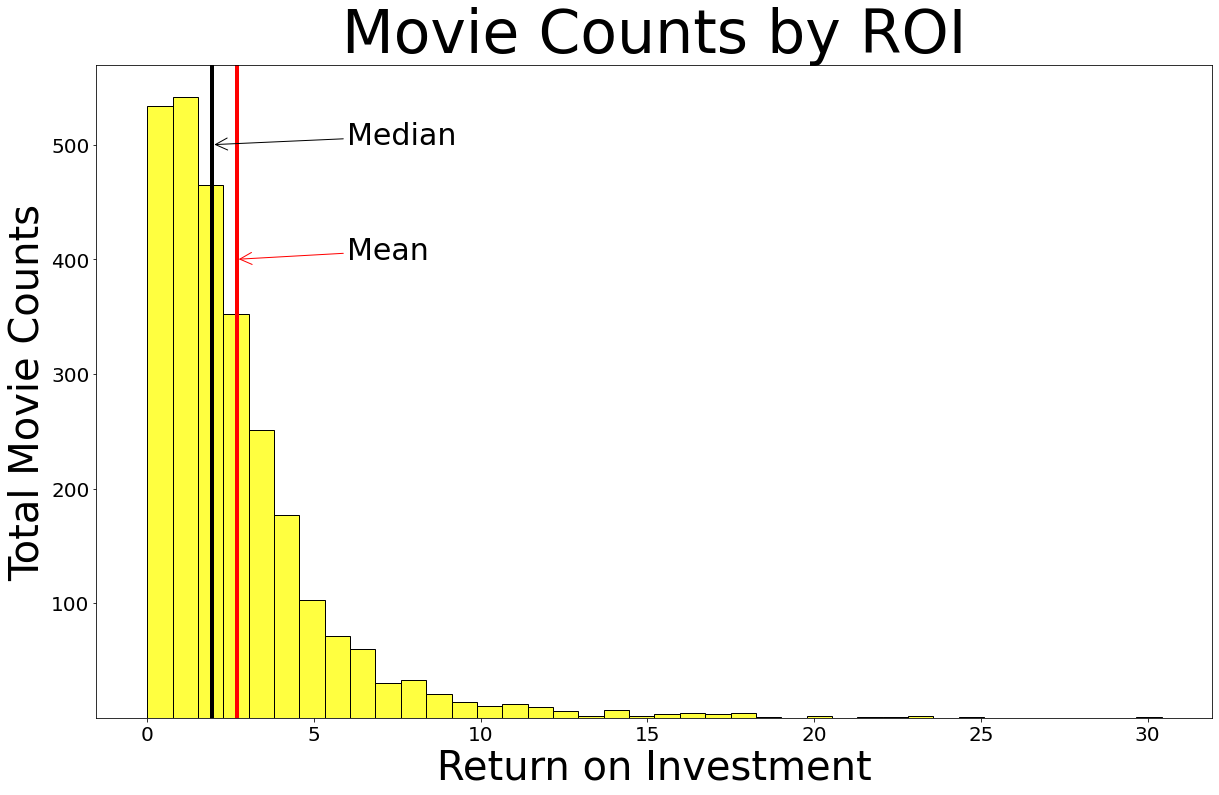

In [116]:
# Further investigate ROI by adding a new column 'ROI Category'

fig, ax = plt.subplots(figsize=(20, 12))
sns.histplot(x=tn['ROI'], data=tn, bins=40, color='yellow')
plt.title("Movie Counts by ROI", fontsize=60)
plt.xlabel("Return on Investment", fontsize=40)
plt.ylabel("Total Movie Counts", fontsize=40)
plt.axvline(tn['ROI'].mean(), color='r', linestyle='-', linewidth=4)
plt.axvline(tn['ROI'].median(), color='black', linestyle='-', linewidth=4)
plt.annotate('Mean', xy=(tn['ROI'].mean(), 400), xytext=(6, 400),
             fontsize=30, arrowprops={'arrowstyle': '->', 'color': 'red'})
plt.annotate('Median', xy=(tn['ROI'].median(), 500), xytext=(6, 500),
             fontsize=30, arrowprops={'arrowstyle': '->', 'color': 'black'})
plt.xticks(fontsize=20)
plt.yticks(range(100,600,100),fontsize=20)
plt.show()

In [117]:
# Find descriptive statistics of ROI

print('Median ROI:  ' + str(round(tn['ROI'].median(), 3)))
print('Mean ROI:    ' + str(round(tn['ROI'].mean(), 3)))
print('Maximum ROI: ' + str(round(tn['ROI'].max(), 3)))
print('Minimum ROI: ' + str(round(tn['ROI'].min(), 3)))

Median ROI:  1.954
Mean ROI:    2.685
Maximum ROI: 30.422
Minimum ROI: 0.0


In [145]:
# Clean other tables for future merging.

selected_columns = ['genre_ids','original_title','release_date','title',
                    'popularity', 'vote_average','vote_count']
tmdb = tmdb_movies_df[selected_columns]
tmdb = tmdb.rename(columns={'genre_ids':'Genre ID', 'original_title':'Original Title',
                            'release_date':'Date', 'title':'Movie', 
                            'vote_average':'Rating', 'popularity':'Popularity',
                            'vote_count':'Reviews'})
tmdb = tmdb.set_index(["Movie"])


In [146]:
tmdb

,Genre ID,Original Title,Date,Popularity,Rating,Reviews
Movie,,,,,,
Harry Potter and the Deathly Hallows: Part 1,"[12, 14, 10751]",Harry Potter and the Deathly Hallows: Part 1,2010-11-19,33.533,7.7,10788
How to Train Your Dragon,"[14, 12, 16, 10751]",How to Train Your Dragon,2010-03-26,28.734,7.7,7610
Iron Man 2,"[12, 28, 878]",Iron Man 2,2010-05-07,28.515,6.8,12368
Toy Story,"[16, 35, 10751]",Toy Story,1995-11-22,28.005,7.9,10174
Inception,"[28, 878, 12]",Inception,2010-07-16,27.920,8.3,22186
...,...,...,...,...,...,...
Laboratory Conditions,"[27, 18]",Laboratory Conditions,2018-10-13,0.600,0.0,1
_EXHIBIT_84xxx_,"[18, 53]",_EXHIBIT_84xxx_,2018-05-01,0.600,0.0,1
The Last One,"[14, 28, 12]",The Last One,2018-10-01,0.600,0.0,1


In [124]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Genre ID        26517 non-null  object 
 1   Original Title  26517 non-null  object 
 2   Date            26517 non-null  object 
 3   Movie           26517 non-null  object 
 4   Popularity      26517 non-null  float64
 5   Rating          26517 non-null  float64
 6   Reviews         26517 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 1.4+ MB


In [168]:
# Want to see if elements in the list under the column 'Genre ID' are int.
genre_id_str = []
genre_id_int = []
genre_id_other =[]

for element in tmdb['Genre ID']:
    for entry in element:
        if type(entry) == str:
            genre_id_str.append(entry)
        elif type(entry) == int:
            genre_id_int.append(entry)
        else:
            genre_id_other.append(entry)

print(len(genre_id_str))
print(len(genre_id_int))
print(len(genre_id_other))

210315
0
0


In [153]:
# We see that they are not.
# From tmdb's website, obtain genre ids and their corresponding verbal category.
# Create a dictionary to store that information.

genre_id = {'28':'Action', '12':'Adventure', '16':'Animation', '35':'Comedy', '80':'Crime',
            '99':'Documentary', '18':'Drama', '10751':'Family', '14':'Fantasy', '36':'History',
            '27':'Horror', '10402':'Music', '9648':'Mystery', '10749':'Romance',
            '878':'Science Fiction', '10770':'TV Movie', '53':'Thriller', '10752':'War',
            '37':'Western'}
genre_id

{'28': 'Action',
 '12': 'Adventure',
 '16': 'Animation',
 '35': 'Comedy',
 '80': 'Crime',
 '99': 'Documentary',
 '18': 'Drama',
 '10751': 'Family',
 '14': 'Fantasy',
 '36': 'History',
 '27': 'Horror',
 '10402': 'Music',
 '9648': 'Mystery',
 '10749': 'Romance',
 '878': 'Science Fiction',
 '10770': 'TV Movie',
 '53': 'Thriller',
 '10752': 'War',
 '37': 'Western'}

In [172]:
for entry in tmdb['Genre ID']:
    entry.split(',')
    
for entry in tmdb['Genre ID']:
    print(type(entry))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [157]:
# Create a new column on tmdb that displays the movie genres.

tmdb['Genre'] = ''

In [207]:
# Explore bom_gross_df

bom_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [208]:
bom_gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [228]:
# Also clean bom_gross_df

bom = bom_gross_df

In [229]:
# Explore more into bom

bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
 5   Revenue         2009 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 158.9+ KB


In [230]:
bom['foreign_gross'] = pd.to_numeric(bom['foreign_gross'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [231]:
# Create a new column 'Revenue' to incorporate domestic_gross and foriegn_gross.

bom['Revenue'] = bom['domestic_gross']+bom['foreign_gross']
bom = bom.rename(columns = {'title':'Movie', 'studio':'Studio', 'year':'Date'})

In [236]:
selected_columns = ['Movie', 'Studio', 'Date', 'Revenue']
bom = bom[selected_columns]


KeyError: "['Movie'] not in index"

In [235]:
bom

,Studio,Date,Revenue
Movie,,,
Toy Story 3,BV,2010,1.067000e+09
Alice in Wonderland (2010),BV,2010,1.025500e+09
Harry Potter and the Deathly Hallows Part 1,WB,2010,9.603000e+08
Inception,WB,2010,8.283000e+08
Shrek Forever After,P/DW,2010,7.526000e+08
...,...,...,...
The Quake,Magn.,2018,NaN
Edward II (2018 re-release),FM,2018,NaN
El Pacto,Sony,2018,NaN
